# Finite Element Method for 1D heat conduction

In [1]:
##Input data for 25 cm concrete wall##
L=0.25 #wall length
k=1 #Conductivity
ϱ=2400 #Density
c=1000 #Specific heat capacity
br_e=99 #Number of elements
br_cv=br_e+1 #Number of nodes
vrk=480 #Number of time steps
T=28800 #Final time in [s]
ΔT=T/vrk #Time step
Le=L/br_e #FEM element length
Θ=2/3 # B. Johannesson: Modelling of transport processes involved in service life prediction of concrete: important principles
a0=30 #Left initial temperature
b0=22 #Right initial temperature
a=25 #Left boundary condition
b=22; #Right boundary condition

In [2]:
include("Edof.jl") #Function of elements and nodes

Edof (generic function with 1 method)

In [3]:
E_dof=Edof(br_e);

In [4]:
##**Boundary and Initial condition**##

#*Boundary condition*#
ru=[[1 a];[br_cv b]] #Boundary conditions matrix

#*Initial condition*#
pu=zeros(br_cv,1) 
x=a0
for i=1:br_cv-1
    pu[i,1]=x
    x=x-1/br_e*(a0-b0)
end
pu[br_cv,1]=b0 

#*Zero matrices*#
K=zeros(br_cv,br_cv) #Empty stifness matrix
C=zeros(br_cv,br_cv) #Empty damping matrix
R=zeros(br_cv,vrk); #Empty solution matrix

In [5]:
##**Element matrices**##
Ke=k/Le*[[1 -1];[-1 1]] #Element stiffness matrix
Ce=ϱ*c*Le/6*[[2 1];[1 2]]; #Element damping matrix

In [6]:
include("assem(CALFEMv3.4).jl") #Function for assembling global matrices from element matrices

assem (generic function with 3 methods)

In [7]:
#Global stiffness matrix
K_glob=assem(E_dof,K,Ke)
#Global damping matrix
C_glob=assem(E_dof,C,Ce);

In [8]:
include("solveq(CALFEMv3.4).jl") #Function for solving FEM equation

solveq (generic function with 2 methods)

In [9]:
##**Solution**##
#*step 0, initial condition as first row of solution matrix R*#
R[:,1]=pu #Initial vector as 1st column of solution matrix R
R[1,1]=a #Left boundary condition
R[br_cv,br_cv]=b; #Right boundary condition

#*Solution loop for time dependent problem*#
for i=1:(vrk-1)
    K_t=C_glob/ΔT+Θ*K_glob 
    f_t=(C_glob/ΔT-K_glob*(1-Θ))*pu 
    pu1=solveq(K_t,f_t,ru) 
    R[:,i+1]=pu1 
    pu=pu1
end

In [10]:
using Plots

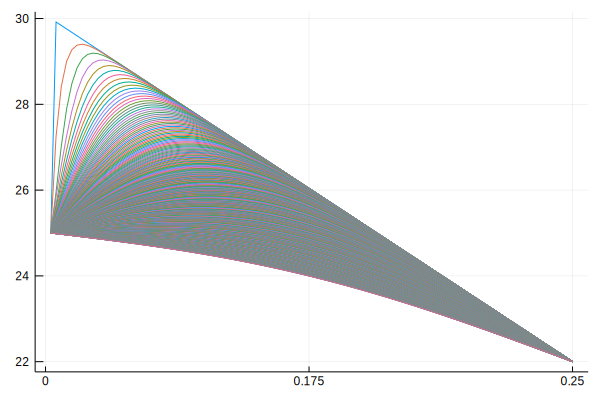

In [11]:
##**Plot for all the timesteps**##
for i=1:vrk
    a=plot!(R[:,i],legend=false, xticks = ([0:50:100;],["0","0.175","0.25"]))
end
a

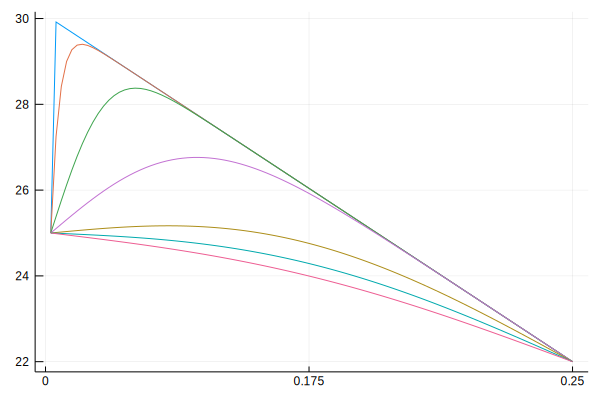

In [12]:
##**Selected time steps plot**##
b1=R[:,1]
b2=R[:,2]
b3=R[:,11]
b4=R[:,61]
b5=R[:,240]
b6=R[:,360]
b7=R[:,480]
plot(b1,legend=false, xticks = ([0:br_cv/2:br_cv;],["0","0.175","0.25"]))
plot!(b2,legend=false, xticks = ([0:br_cv/2:br_cv;],["0","0.175","0.25"]))
plot!(b3,legend=false, xticks = ([0:br_cv/2:br_cv;],["0","0.175","0.25"]))
plot!(b4,legend=false, xticks = ([0:br_cv/2:br_cv;],["0","0.175","0.25"]))
plot!(b5,legend=false, xticks = ([0:br_cv/2:br_cv;],["0","0.175","0.25"]))
plot!(b6,legend=false, xticks = ([0:br_cv/2:br_cv;],["0","0.175","0.25"]))
plot!(b7,legend=false, xticks = ([0:br_cv/2:br_cv;],["0","0.175","0.25"]))

In [13]:
#For saving data from solution matrix R as CSV, run the following without marks
# using DelimitedFiles
# writedlm("FileName.csv",  R, ',')